# Networkx Basics

In [25]:
from string import ascii_uppercase
import networkx as nx
import matplotlib.pyplot as plt

%matplotlib inline

In [26]:
G = nx.Graph()

In [27]:
G.add_nodes_from(ascii_uppercase[:5])

In [28]:
G.add_edges_from([('A', 'B'), ('A', 'C'), ('A', 'D'), ('B', 'C'), ('B', 'D'),
                  ('D', 'E')])

In [29]:
print(G.number_of_nodes())
print(G.number_of_edges())

5
6


In [30]:
list(G.nodes)

['A', 'B', 'C', 'D', 'E']

In [32]:
list(G.edges)

[('A', 'B'), ('A', 'C'), ('A', 'D'), ('B', 'C'), ('B', 'D'), ('D', 'E')]

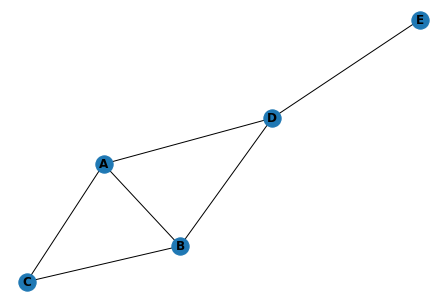

In [33]:
nx.draw(G, with_labels=True, font_weight='bold')